Early stopping is a method used to handle the overfitting problem in deep neural networks. When training a model with a large number of epochs, there may be a certain period of time where the accuracy starts to decrease, leading to overfitting. By applying the early stopping method, we can overcome this issue. The method allows the model to learn and stops the training process when the maximum accuracy is achieved. This approach enhances computational efficiency, improves running capabilities, and provides better results.

In [1]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
!pip install seaborn matplotlib
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Packages for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [4]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

In [5]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [6]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

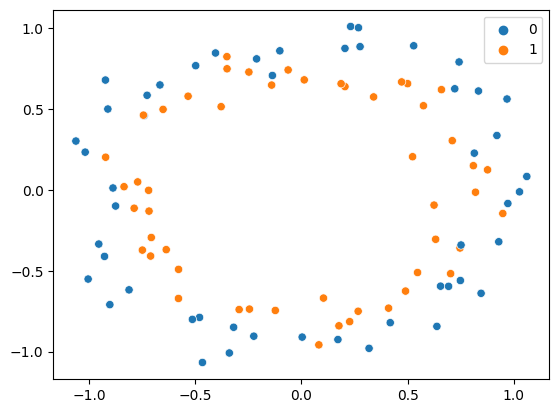

In [8]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               768       
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


a. Total trainable parameter is 1025.
in x--- 2 input data ie., x1 and x2
in 1st hidden layer we have given 0 to 256 neurons ----- 2*256 = 512, we get 256 outputs.
therefore 512+256 = 768 (which is the parameter of the 1st architecture.

b. output = 1 (given), 256*1 + 1 = 257


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5000)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 32ms/step - loss: 0.2064 - accuracy: 0.9000 - val_loss: 0.4447 - val_accuracy: 0.8500
Epoch 2502/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.2072 - accuracy: 0.9000 - val_loss: 0.4422 - val_accuracy: 0.8500
Epoch 2503/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.2064 - accuracy: 0.9125 - val_loss: 0.4340 - val_accuracy: 0.8500
Epoch 2504/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.2058 - accuracy: 0.9125 - val_loss: 0.4312 - val_accuracy: 0.8500
Epoch 2505/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.2063 - accuracy: 0.9125 - val_loss: 0.4239 - val_accuracy: 0.8500
Epoch 2506/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.2067 - accuracy: 0.9250 - val_loss: 0.4219 - val_accuracy: 0.8500
Epoch 2507/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.2086 - accuracy: 0.9250

From the above we can say, When working with a large number of input features, it can become challenging to train a deep neural network. After performing 5000 epochs, we may not observe significant differences between the training and test results. This can lead to computational challenges, especially when dealing with large datasets. In such cases, the system may become completely unresponsive or hang.

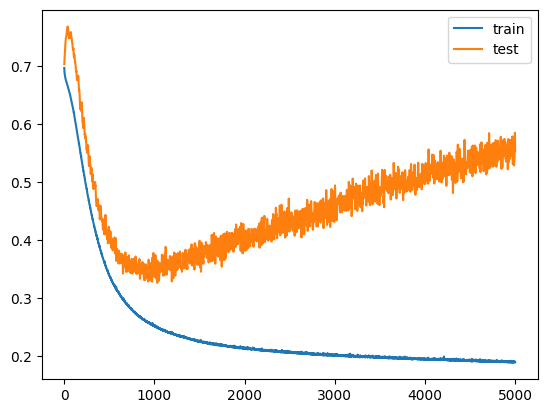

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

From the above observation, we can see that the training process is progressing well, but the test data exhibits a certain point where the results start to increase. In the training phase, the loss value is around 20%, while in the test phase, it ranges from 50% to 60%. This indicates a variance of more than 15%, suggesting an overfit model.

Reason : Due to epochs value is high (ie., 5000)

Thus we use Early stopping method. 
Benifits of this method : 


1.   Reduce time
2.   Model will not create overfitting problem



Early Stopping

In [15]:
model1 = Sequential()
model1.add(Dense(256, input_dim=2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Parameter
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=50,
    verbose=0, mode='auto',
    baseline=None,
    restore_best_weights=False,
    )
# Verbose = 1 means we can see the output as how many times ephochs runs



1.   patience: It indicates the number of epochs with no improvement after which training will be stopped. If the monitored quantity does not improve for patience consecutive epochs, the training process will stop early

2.   min_delta: It represents the minimum change in the monitored quantity that qualifies as an improvement. If the change is less than min_delta, it will not be considered as an improvement.

3.   verbose: This parameter controls the verbosity mode. It determines the amount of information displayed during the training process. A value of 0 means silent mode, while a higher value provides more information.

4.   baseline: It represents a value to be considered as the baseline for comparison. If the monitored quantity does not improve with respect to the baseline value, it will be considered as no improvement.

5.   restore_best_weights: When set to True, it restores the weights of the model to the ones obtained at the epoch with the best performance. This is useful when you want to keep the best model for further evaluation or predictions.

6.   start_from_epoch: It specifies the epoch number from which the early stopping method will start monitoring. By default, it is set to 0, meaning it will start monitoring from the beginning of training.

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, callbacks=callback)

Epoch 1/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.1898 - accuracy: 0.9250 - val_loss: 0.5409 - val_accuracy: 0.8500
Epoch 2/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.1901 - accuracy: 0.9250 - val_loss: 0.5351 - val_accuracy: 0.8500
Epoch 3/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.1906 - accuracy: 0.9250 - val_loss: 0.5331 - val_accuracy: 0.8500
Epoch 4/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.1906 - accuracy: 0.9250 - val_loss: 0.5356 - val_accuracy: 0.8500
Epoch 5/5000
3/3 [==============================] - 0s 17ms/step - loss: 0.1906 - accuracy: 0.9250 - val_loss: 0.5398 - val_accuracy: 0.8500
Epoch 6/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.1902 - accuracy: 0.9250 - val_loss: 0.5529 - val_accuracy: 0.8500
Epoch 7/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.1905 - accuracy: 0.9125 - val_loss: 0.5616 - val_accuracy: 0.8500
Epoch 8/5000


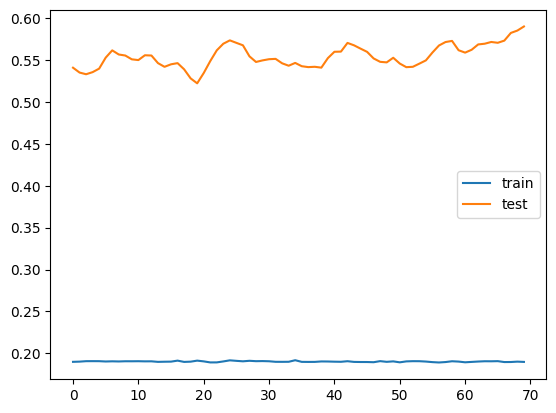

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


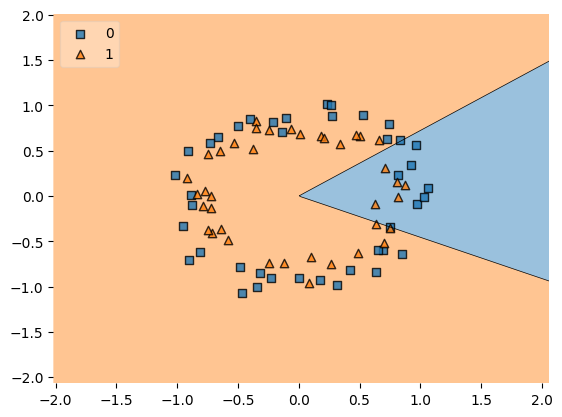

In [21]:
plot_decision_regions(x_train, y_train.ravel(), clf = model1, legend=2)
plt.show()

9600/9600 [==============================] - 13s 1ms/step


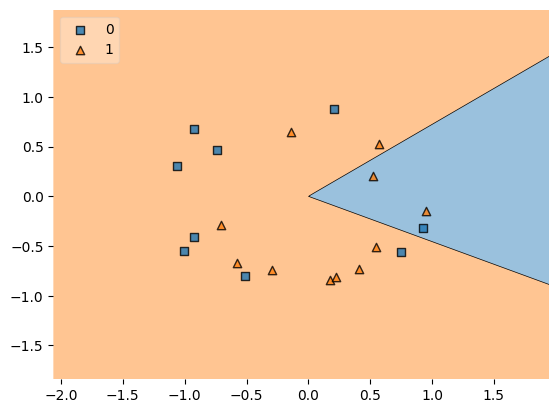

In [22]:
plot_decision_regions(x_test, y_test.ravel(), clf = model1, legend=2)
plt.show()